In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


In [32]:
data = X_train.copy()

m = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R = evecs[:,idx][:,:100]
inertia = evals[idx]

Rm =np.dot(m,R)
respca = np.dot(data, R) - Rm

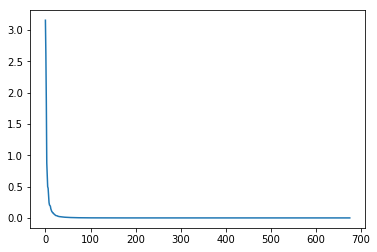

In [33]:
plt.plot(inertia)
plt.show()

In [36]:
# Second PCA

data = respca.copy()
m2 = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R2 = evecs[:,idx][:,:50]
inertia = evals[idx]

Rm2 =np.dot(m2,R2)
respca = np.dot(data, R2) - Rm2

In [74]:
# CREATION DU RESEAU DE NEURONE

sess.close()
shape = 676
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(tf.constant(R.astype("float32")))
b1 = tf.Variable(tf.constant(-Rm.astype("float32")))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(tf.constant(R2.astype("float32")))
b2 = tf.Variable(tf.constant(-Rm2.astype("float32")))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(np.zeros([50,10]).astype("float32"))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

epoch :  0 / 1000, accuracy :  0.11111111, loss :  3.3007667, 
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2444332, 
epoch :  20 / 1000, accuracy :  0.074074075, loss :  3.2392101, 
epoch :  30 / 1000, accuracy :  0.074074075, loss :  3.2368326, 
epoch :  40 / 1000, accuracy :  0.074074075, loss :  3.2345738, 
epoch :  50 / 1000, accuracy :  0.074074075, loss :  3.232286, 
epoch :  60 / 1000, accuracy :  0.074074075, loss :  3.229954, 
epoch :  70 / 1000, accuracy :  0.074074075, loss :  3.22757, 
epoch :  80 / 1000, accuracy :  0.074074075, loss :  3.2251267, 
epoch :  90 / 1000, accuracy :  0.074074075, loss :  3.2226179, 
epoch :  100 / 1000, accuracy :  0.074074075, loss :  3.2200375, 
epoch :  110 / 1000, accuracy :  0.074074075, loss :  3.2173798, 
epoch :  120 / 1000, accuracy :  0.074074075, loss :  3.2146394, 
epoch :  130 / 1000, accuracy :  0.074074075, loss :  3.2118096, 
epoch :  140 / 1000, accuracy :  0.074074075, loss :  3.2088854, 
epoch :  150 / 1000, accur

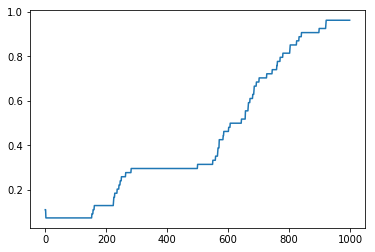

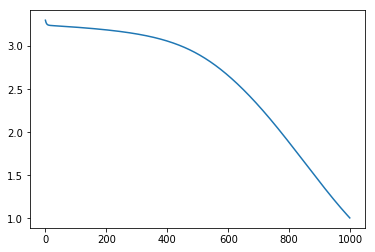

In [75]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l , end=", ")
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()